- 결측치 처리 : 결측치 비율 높은 컬럼 삭제
- 눈/비 관련 변수 결측치 처리 : 0으로 대체 → 강수량 없는 날 특성 반영
- 결측치 비율이 10% 이하인 변수들에 대해 선형 보간법 사용하여 결측치 채움
- 시각(hhmi가 포함된 열) 포함 컬럼 삭제
- 변수 명칭 변경(지점명 → 지역 / 일시 → 일자)

In [8]:
import pandas as pd

file_path = '../data/raw/weather.csv'
df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)

In [9]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,90,속초,2019-01-03,-0.4,-4.1,624.0,4.6,1300.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2019-01-04,2.6,-3.1,404.0,6.3,1306.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2019-01-05,0.8,-3.3,1955.0,3.5,1251.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2019-01-06,0.7,-2.6,451.0,5.5,1341.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,2019-01-07,2.0,-2.0,640.0,6.2,1437.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(208277, 62)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208277 entries, 0 to 208276
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   지점                   208277 non-null  int64  
 1   지점명                  208277 non-null  object 
 2   일시                   208277 non-null  object 
 3   평균기온(°C)             207977 non-null  float64
 4   최저기온(°C)             208165 non-null  float64
 5   최저기온 시각(hhmi)        208168 non-null  float64
 6   최고기온(°C)             208172 non-null  float64
 7   최고기온 시각(hhmi)        208175 non-null  float64
 8   강수 계속시간(hr)          20186 non-null   float64
 9   10분 최다 강수량(mm)       51962 non-null   float64
 10  10분 최다강수량 시각(hhmi)   35528 non-null   float64
 11  1시간 최다강수량(mm)        51932 non-null   float64
 12  1시간 최다 강수량 시각(hhmi)  36823 non-null   float64
 13  일강수량(mm)             79474 non-null   float64
 14  최대 순간 풍속(m/s)        207955 non-null  float64
 15  최대 순간 풍속 풍향(16방위)

In [17]:
df.isnull().sum()

지점                          0
지점명                         0
일시                          0
평균기온(°C)                  300
최저기온(°C)                  112
최저기온 시각(hhmi)             109
최고기온(°C)                  105
최고기온 시각(hhmi)             102
강수 계속시간(hr)            188091
10분 최다 강수량(mm)         156315
10분 최다강수량 시각(hhmi)     172749
1시간 최다강수량(mm)          156345
1시간 최다 강수량 시각(hhmi)    171454
일강수량(mm)               128803
최대 순간 풍속(m/s)             322
최대 순간 풍속 풍향(16방위)         320
최대 순간풍속 시각(hhmi)          319
최대 풍속(m/s)                321
최대 풍속 풍향(16방위)            315
최대 풍속 시각(hhmi)            314
평균 풍속(m/s)                395
풍정합(100m)                 437
최다풍향(16방위)                650
평균 이슬점온도(°C)              428
최소 상대습도(%)                148
최소 상대습도 시각(hhmi)          144
평균 상대습도(%)                405
평균 증기압(hPa)               431
평균 현지기압(hPa)              319
최고 해면기압(hPa)              187
최고 해면기압 시각(hhmi)          170
최저 해면기압(hPa)              238
최저 해면기압 시각(hhmi)          168
평균 해면기압(hP

In [13]:
df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온

In [19]:
df['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '진도(첨찰산)', '홍성',
       '서청주', '제주', '고산', '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천',
       '태백', '정선군', '제천', '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실',
       '정읍', '남원', '장수', '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군',
       '강진군', '장흥', '해남', '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주',
       '문경', '청송군', '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청',
       '거제', '남해', '북부산'], dtype=object)

In [20]:
# 필요한 지역만 남기기
selected_regions = [
    '대전', '인천', '부산', '광주', '서울', '창원', '안양', '구리', '청주', '울산', '안산', '대구', '전주', '천안', '수원', '충주', '춘천', '강릉', '익산', '원주', '진주', '정읍', '순천', '포항', '구미', '안동'
]

# 지점명 필터링
filtered_data = df[df['지점명'].isin(selected_regions)]

In [21]:
print(filtered_data.shape)
print(filtered_data['지점명'].value_counts())

(47916, 62)
지점명
춘천    2178
강릉    2178
서울    2178
인천    2178
원주    2178
수원    2178
충주    2178
청주    2178
대전    2178
안동    2178
포항    2178
대구    2178
전주    2178
울산    2178
창원    2178
광주    2178
부산    2178
순천    2178
진주    2178
천안    2178
정읍    2178
구미    2178
Name: count, dtype: int64


In [26]:
# 지역 매핑
region_mapping = {
    '구리': '서울',
    '안산': '수원',
    '안양': '서울',
    '익산': '군산'
}

In [28]:
# 매핑된 지역 생성
for new_region, source_region in region_mapping.items():
    # 기존 데이터를 복사하여 새 지역으로 추가
    new_region_data = df[df['지점명'] == source_region].copy()
    new_region_data['지점명'] = new_region  # 지점명 변경
    df = pd.concat([df, new_region_data], ignore_index=True)


In [29]:
# 필요한 지역 리스트 정의
selected_regions = [
    '대전', '인천', '부산', '광주', '서울', '창원', '청주', '울산',
    '수원', '대구', '전주', '천안', '충주', '춘천', '강릉', '군산',
    '원주', '진주', '정읍', '순천', '포항', '구미', '안동', '익산',
    '구리', '안산', '안양'
]

In [30]:
# 필요한 지역만 남기고 나머지 삭제
filtered_data = df[df['지점명'].isin(selected_regions)]

In [31]:
filtered_data_shape = filtered_data.shape
filtered_regions = filtered_data['지점명'].unique()

In [32]:
filtered_data_shape, filtered_regions

((58804, 62),
 array(['춘천', '강릉', '서울', '인천', '원주', '수원', '충주', '청주', '대전', '안동', '포항',
        '군산', '대구', '전주', '울산', '창원', '광주', '부산', '순천', '진주', '천안', '정읍',
        '구미', '구리', '안산', '안양', '익산'], dtype=object))

In [34]:
# 거래 데이터의 지역 리스트
trade_regions = [
    '대전', '인천', '부산', '광주', '서울', '창원', '안양', '구리', '청주', '울산',
    '안산', '대구', '전주', '천안', '수원', '충주', '춘천', '강릉', '익산', '원주',
    '진주', '정읍', '순천', '포항', '구미', '안동'
]

# 필터링된 데이터의 지점명 리스트 (필터링 작업 후 데이터)
filtered_regions = [
    '춘천', '강릉', '서울', '인천', '원주', '수원', '충주', '청주', '대전', '안동', '포항',
    '군산', '대구', '전주', '울산', '창원', '광주', '부산', '순천', '진주', '천안', '정읍',
    '구미', '구리', '안산', '안양', '익산'
]

# 거래 데이터의 지역 중 필터링된 데이터에 없는 지역 찾기
missing_regions = set(trade_regions) - set(filtered_regions)
missing_regions


set()

In [ ]:
# 거래 데이터의 지역 리스트
trade_regions = [
    '대전', '인천', '부산', '광주', '서울', '창원', '안양', '구리', '청주', '울산',
    '안산', '대구', '전주', '천안', '수원', '충주', '춘천', '강릉', '익산', '원주',
    '진주', '정읍', '순천', '포항', '구미', '안동'
]

# 필터링된 데이터의 지점명 리스트 (필터링 작업 후 데이터)
filtered_regions = [
    '춘천', '강릉', '서울', '인천', '원주', '수원', '충주', '청주', '대전', '안동', '포항',
    '군산', '대구', '전주', '울산', '창원', '광주', '부산', '순천', '진주', '천안', '정읍',
    '구미', '구리', '안산', '안양', '익산'
]

# 거래 데이터의 지역 중 필터링된 데이터에 없는 지역 찾기
missing_regions = set(trade_regions) - set(filtered_regions)
missing_regions


In [43]:
# 결측치 확인
missing_values = filtered_data.isnull().sum()

# 결측치 비율 계산
missing_percentage = (filtered_data.isnull().sum() / len(filtered_data)) * 100

# 결측치 정보를 데이터프레임으로 정리
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_info)

                     Missing Values  Missing Percentage (%)
일 최심신적설 시각(hhmi)              58178               98.935447
합계 3시간 신적설(cm)                58134               98.860622
일 최심신적설(cm)                   58126               98.847017
일 최심적설 시각(hhmi)               57768               98.238215
일 최심적설(cm)                    57741               98.192300
안개 계속시간(hr)                   57484               97.755255
10분 최다강수량 시각(hhmi)            48844               83.062377
1시간 최다 강수량 시각(hhmi)           48446               82.385552
9-9강수(mm)                     47006               79.936739
강수 계속시간(hr)                   45175               76.823005
1시간 최다강수량(mm)                 43810               74.501735
10분 최다 강수량(mm)                43804               74.491531
0.5m 지중온도(°C)                 38393               65.289776
1.0m 지중온도(°C)                 38380               65.267669
1.5m 지중온도(°C)                 38379               65.265968
5.0m 지중온도(°C)                 38369     

In [51]:
# 눈과 비 관련 컬럼
precipitation_columns = [
    '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '합계 3시간 신적설(cm)','일 최심적설(cm)', '일 최심적설 시각(hhmi)',
    '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
    '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)',
    '강수 계속시간(hr)', '일강수량(mm)', '9-9강수(mm)'
]

# .loc[]로 값 대체
filtered_data.loc[:, precipitation_columns] = filtered_data[precipitation_columns].fillna(0)



In [52]:
# 결측치 다시 확인
missing_values = filtered_data.isnull().sum()
missing_percentage = (filtered_data.isnull().sum() / len(filtered_data)) * 100

# 결측치 정보를 데이터프레임으로 정리
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_info)


                     Missing Values  Missing Percentage (%)
안개 계속시간(hr)                   57484               97.755255
0.5m 지중온도(°C)                 38393               65.289776
1.0m 지중온도(°C)                 38380               65.267669
1.5m 지중온도(°C)                 38379               65.265968
5.0m 지중온도(°C)                 38369               65.248963
3.0m 지중온도(°C)                 38364               65.240460
평균 5cm 지중온도(°C)               37872               64.403782
평균 30cm 지중온도(°C)              37870               64.400381
평균 20cm 지중온도(°C)              37869               64.398680
평균 10cm 지중온도(°C)              37849               64.364669
기사                            36089               61.371675
합계 대형증발량(mm)                  15726               26.743079
합계 소형증발량(mm)                  15726               26.743079
합계 일사량(MJ/m2)                 15461               26.292429
1시간 최다일사량(MJ/m2)              15444               26.263519
1시간 최다일사 시각(hhmi)             15431     

In [53]:
# 결측치 비율이 10% 이하인 열 필터링
columns_to_interpolate = missing_info[missing_info['Missing Percentage (%)'] <= 10].index.tolist()

# 시간 순으로 정렬
filtered_data.sort_values(['지점명', '일시'], inplace=True)

# 보간법으로 결측치 채우기 (선형 보간법)
filtered_data[columns_to_interpolate] = filtered_data[columns_to_interpolate].interpolate(method='linear')

# 보간법 적용 후 결측치 확인
remaining_missing = filtered_data[columns_to_interpolate].isnull().sum()
remaining_missing


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15620\1451707012.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filtered_data[columns_to_interpolate] = filtered_data[columns_to_interpolate].interpolate(method='linear')


평균 중하층운량(1/10)         0
평균 전운량(1/10)           0
합계 일조시간(hr)            0
최다풍향(16방위)             0
풍정합(100m)              0
최저 초상온도(°C)            0
평균 풍속(m/s)             0
평균 증기압(hPa)            0
평균 상대습도(%)             0
평균 지면온도(°C)            0
최대 순간 풍속 풍향(16방위)      0
최대 순간 풍속(m/s)          0
최대 순간풍속 시각(hhmi)       0
평균 이슬점온도(°C)           0
최대 풍속(m/s)             0
최대 풍속 시각(hhmi)         0
최대 풍속 풍향(16방위)         0
평균 현지기압(hPa)           0
평균 해면기압(hPa)           0
최저 해면기압(hPa)           0
평균기온(°C)               0
최고 해면기압(hPa)           0
최저 해면기압 시각(hhmi)       0
최고 해면기압 시각(hhmi)       0
최소 상대습도 시각(hhmi)       0
최소 상대습도(%)             0
가조시간(hr)               0
최저기온(°C)               0
최저기온 시각(hhmi)          0
최고기온(°C)               0
최고기온 시각(hhmi)          0
일시                     0
강수 계속시간(hr)            0
10분 최다 강수량(mm)         0
10분 최다강수량 시각(hhmi)     0
1시간 최다강수량(mm)          0
1시간 최다 강수량 시각(hhmi)    0
지점                     0
일강수량(mm)               0
지점명                    0


In [ ]:
# 결측치 정보 갱신
missing_values = filtered_data.isnull().sum()
missing_percentage = (filtered_data.isnull().sum() / len(filtered_data)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_info)


                     Missing Values  Missing Percentage (%)
안개 계속시간(hr)                   57484               97.755255
0.5m 지중온도(°C)                 38393               65.289776
1.0m 지중온도(°C)                 38380               65.267669
1.5m 지중온도(°C)                 38379               65.265968
5.0m 지중온도(°C)                 38369               65.248963
3.0m 지중온도(°C)                 38364               65.240460
평균 5cm 지중온도(°C)               37872               64.403782
평균 30cm 지중온도(°C)              37870               64.400381
평균 20cm 지중온도(°C)              37869               64.398680
평균 10cm 지중온도(°C)              37849               64.364669
기사                            36089               61.371675
합계 대형증발량(mm)                  15726               26.743079
합계 소형증발량(mm)                  15726               26.743079
합계 일사량(MJ/m2)                 15461               26.292429
1시간 최다일사량(MJ/m2)              15444               26.263519
1시간 최다일사 시각(hhmi)             15431     

In [56]:
# 상관관계 분석
correlation = filtered_data[[
    '평균기온(°C)', '일강수량(mm)', '평균 상대습도(%)', 
    '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)'
]].corr()

print(correlation)


                  평균기온(°C)  일강수량(mm)  평균 상대습도(%)  평균 5cm 지중온도(°C)  \
평균기온(°C)          1.000000  0.166953    0.407540         0.974970   
일강수량(mm)          0.166953  1.000000    0.348550         0.154518   
평균 상대습도(%)        0.407540  0.348550    1.000000         0.423706   
평균 5cm 지중온도(°C)   0.974970  0.154518    0.423706         1.000000   
평균 10cm 지중온도(°C)  0.971686  0.163480    0.430625         0.998121   

                  평균 10cm 지중온도(°C)  
평균기온(°C)                  0.971686  
일강수량(mm)                  0.163480  
평균 상대습도(%)                0.430625  
평균 5cm 지중온도(°C)           0.998121  
평균 10cm 지중온도(°C)          1.000000  


In [58]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

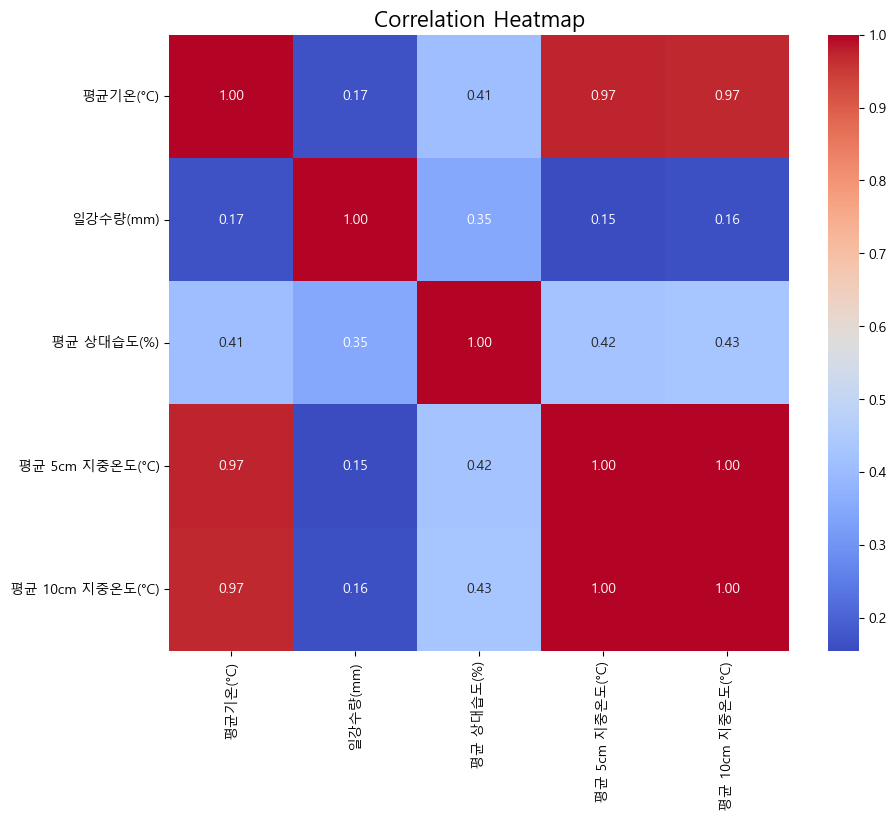

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


- 평균 기온과 평균 지중온도의 상관계수가 높으므로 지중온도는 평균기온 데이터로 정보를 대체해도 될 것 같다.
- 지중온도 컬럼 전부 삭제

In [61]:
# 지중온도 열 삭제
soil_temperature_columns = [
    '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)',
    '5.0m 지중온도(°C)', '3.0m 지중온도(°C)',
    '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
    '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)'
]

filtered_data = filtered_data.drop(columns=soil_temperature_columns)


In [63]:
# 결측치 확인 코드
missing_values = filtered_data.isnull().sum()
missing_percentage = (filtered_data.isnull().sum() / len(filtered_data)) * 100

# 결측치 정보를 데이터프레임으로 정리
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_info)


                     Missing Values  Missing Percentage (%)
안개 계속시간(hr)                   57484               97.755255
기사                            36089               61.371675
합계 대형증발량(mm)                  15726               26.743079
합계 소형증발량(mm)                  15726               26.743079
합계 일사량(MJ/m2)                 15461               26.292429
1시간 최다일사량(MJ/m2)              15444               26.263519
1시간 최다일사 시각(hhmi)             15431               26.241412
최저기온 시각(hhmi)                     0                0.000000
강수 계속시간(hr)                       0                0.000000
10분 최다 강수량(mm)                    0                0.000000
10분 최다강수량 시각(hhmi)                0                0.000000
1시간 최다강수량(mm)                     0                0.000000
1시간 최다 강수량 시각(hhmi)               0                0.000000
일강수량(mm)                          0                0.000000
최고기온(°C)                          0                0.000000
최고기온 시각(hhmi)                     0     

In [64]:
# '안개 계속시간(hr)'과 '기사' 열 삭제
columns_to_drop = ['안개 계속시간(hr)', '기사']
filtered_data = filtered_data.drop(columns=columns_to_drop)

filtered_data.head(), filtered_data.columns

(        지점 지점명          일시  평균기온(°C)  최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  \
 19602  105  강릉  2019-01-03       1.2      -3.2          711.0       6.8   
 19603  105  강릉  2019-01-04       3.8       0.2          519.0       8.4   
 19604  105  강릉  2019-01-05       1.9      -1.2         2015.0       5.1   
 19605  105  강릉  2019-01-06       1.9      -2.3          516.0       7.9   
 19606  105  강릉  2019-01-07       2.6       0.1          759.0       7.4   
 
        최고기온 시각(hhmi)  강수 계속시간(hr)  10분 최다 강수량(mm)  10분 최다강수량 시각(hhmi)  \
 19602         1445.0          0.0             0.0                 0.0   
 19603         1342.0          0.0             0.0                 0.0   
 19604         1400.0          0.0             0.0                 0.0   
 19605         1416.0          0.0             0.0                 0.0   
 19606         1448.0          0.0             0.0                 0.0   
 
        1시간 최다강수량(mm)  1시간 최다 강수량 시각(hhmi)  일강수량(mm)  최대 순간 풍속(m/s)  \
 19602            0.0    

In [65]:
# 지점 컬럼 삭제
columns_to_drop = ['지점']
filtered_data = filtered_data.drop(columns=columns_to_drop)

# 지점명을 지역으로 변경
filtered_data.rename(columns={'지점명': '지역'}, inplace=True)

# 일시를 일자로 변경
filtered_data.rename(columns={'일시': '일자'}, inplace=True)

In [66]:
print(filtered_data.head())
print(filtered_data.columns)

       지역          일자  평균기온(°C)  최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  \
19602  강릉  2019-01-03       1.2      -3.2          711.0       6.8   
19603  강릉  2019-01-04       3.8       0.2          519.0       8.4   
19604  강릉  2019-01-05       1.9      -1.2         2015.0       5.1   
19605  강릉  2019-01-06       1.9      -2.3          516.0       7.9   
19606  강릉  2019-01-07       2.6       0.1          759.0       7.4   

       최고기온 시각(hhmi)  강수 계속시간(hr)  10분 최다 강수량(mm)  10분 최다강수량 시각(hhmi)  \
19602         1445.0          0.0             0.0                 0.0   
19603         1342.0          0.0             0.0                 0.0   
19604         1400.0          0.0             0.0                 0.0   
19605         1416.0          0.0             0.0                 0.0   
19606         1448.0          0.0             0.0                 0.0   

       1시간 최다강수량(mm)  1시간 최다 강수량 시각(hhmi)  일강수량(mm)  최대 순간 풍속(m/s)  \
19602            0.0                  0.0       0.0            8.1   


In [69]:
columns_to_fill = [
    '합계 대형증발량(mm)', '합계 소형증발량(mm)', 
    '합계 일사량(MJ/m2)', '1시간 최다일사량(MJ/m2)', '1시간 최다일사 시각(hhmi)'
]

# 결측치 처리: 시간 순서로 선형 보간법 적용
filtered_data.sort_values(['지역', '일자'], inplace=True)
filtered_data[columns_to_fill] = filtered_data[columns_to_fill].interpolate(method='linear')

# 보간법 적용 후 결측치 확인
remaining_missing = filtered_data[columns_to_fill].isnull().sum()
print(remaining_missing)


합계 대형증발량(mm)         0
합계 소형증발량(mm)         0
합계 일사량(MJ/m2)        0
1시간 최다일사량(MJ/m2)     0
1시간 최다일사 시각(hhmi)    0
dtype: int64


In [70]:
# 결측치 확인 코드
missing_values = filtered_data.isnull().sum()
missing_percentage = (filtered_data.isnull().sum() / len(filtered_data)) * 100

# 결측치 정보를 데이터프레임으로 정리
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_info)


                     Missing Values  Missing Percentage (%)
지역                                0                     0.0
일자                                0                     0.0
평균기온(°C)                          0                     0.0
최저기온(°C)                          0                     0.0
최저기온 시각(hhmi)                     0                     0.0
최고기온(°C)                          0                     0.0
최고기온 시각(hhmi)                     0                     0.0
강수 계속시간(hr)                       0                     0.0
10분 최다 강수량(mm)                    0                     0.0
10분 최다강수량 시각(hhmi)                0                     0.0
1시간 최다강수량(mm)                     0                     0.0
1시간 최다 강수량 시각(hhmi)               0                     0.0
일강수량(mm)                          0                     0.0
최대 순간 풍속(m/s)                     0                     0.0
최대 순간 풍속 풍향(16방위)                 0                     0.0
최대 순간풍속 시각(hhmi)                  0     

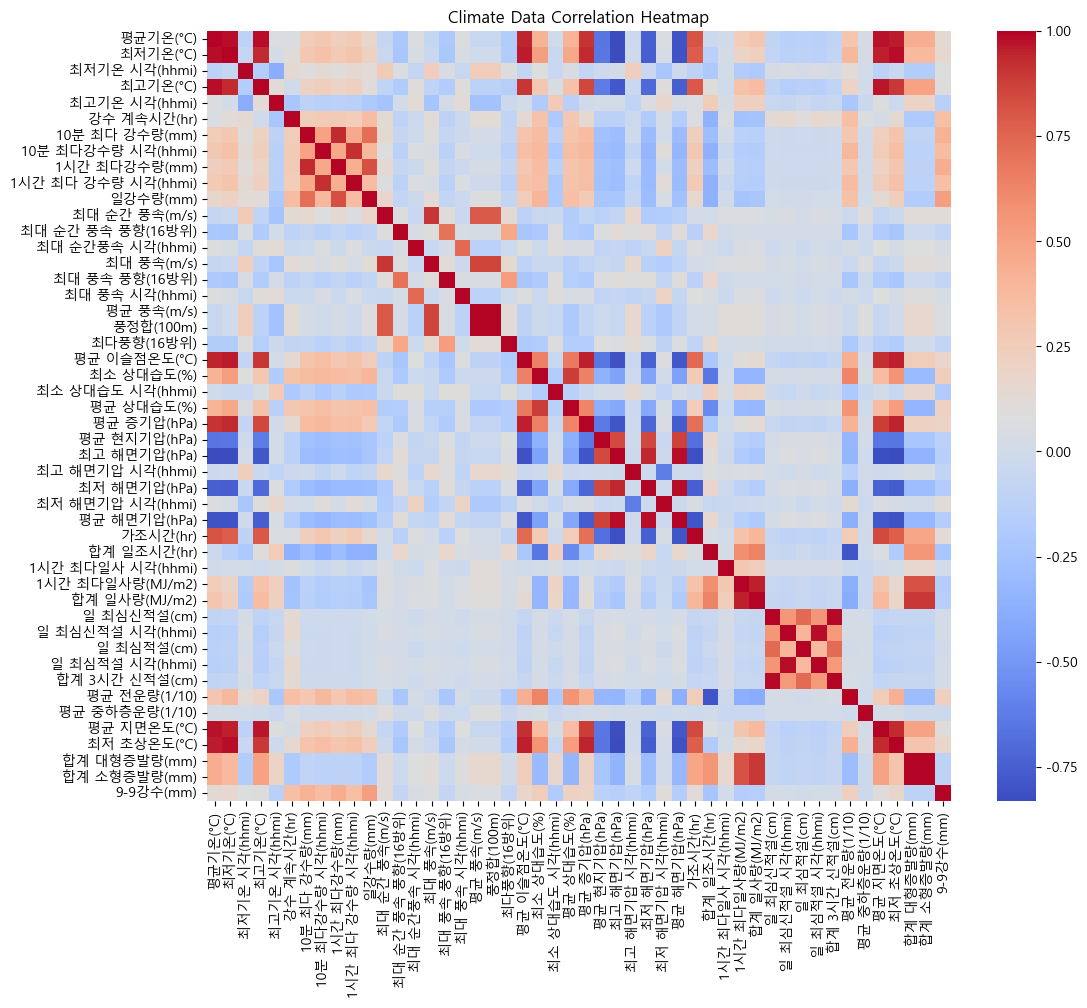

In [72]:
# 숫자형 데이터만 선택
numeric_data = filtered_data.select_dtypes(include=[float, int])

# 상관계수 계산
climate_correlation = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(climate_correlation, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Climate Data Correlation Heatmap')
plt.show()


In [73]:
# 숫자형 데이터만 선택
numeric_data = filtered_data.select_dtypes(include=[float, int])

# 상관계수 계산
climate_correlation = numeric_data.corr()

# 상관계수 절대값 기준 설정
threshold = 0.5

# 기준 이상인 상관계수 필터링
high_corr = climate_correlation[(climate_correlation.abs() >= threshold)]

# 결과를 데이터프레임으로 정리
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2']].drop_duplicates()

# 상관계수 결과 확인
print(high_corr_pairs)


              Variable 1           Variable 2  Correlation
1               평균기온(°C)             최저기온(°C)     0.981350
2               평균기온(°C)             최고기온(°C)     0.979848
3               평균기온(°C)         평균 이슬점온도(°C)     0.947783
4               평균기온(°C)          평균 증기압(hPa)     0.908484
5               평균기온(°C)         평균 현지기압(hPa)    -0.652862
6               평균기온(°C)         최고 해면기압(hPa)    -0.825227
7               평균기온(°C)         최저 해면기압(hPa)    -0.748115
8               평균기온(°C)         평균 해면기압(hPa)    -0.795746
9               평균기온(°C)             가조시간(hr)     0.809475
10              평균기온(°C)          평균 지면온도(°C)     0.976733
11              평균기온(°C)          최저 초상온도(°C)     0.957116
12              최저기온(°C)             평균기온(°C)     0.981350
14              최저기온(°C)             최고기온(°C)     0.930474
15              최저기온(°C)         평균 이슬점온도(°C)     0.957876
16              최저기온(°C)           최소 상대습도(%)     0.515391
17              최저기온(°C)          평균 증기압(hPa)     0.9332

In [74]:
# 'hhmi'가 포함된 열 이름 필터링
time_columns = [col for col in filtered_data.columns if 'hhmi' in col]

# 시각 관련 열 삭제
filtered_data = filtered_data.drop(columns=time_columns)

print(filtered_data.columns)

Index(['지역', '일자', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '강수 계속시간(hr)',
       '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '평균 풍속(m/s)',
       '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최저 해면기압(hPa)',
       '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)', '1시간 최다일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)'],
      dtype='object')


In [76]:
# 남겨야 할 열 목록
columns_to_keep = ['지역', '일자', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)', '평균 풍속(m/s)',   '평균 상대습도(%)', '평균 현지기압(hPa)', '합계 일조시간(hr)', '일 최심신적설(cm)']

# 남겨야 할 열을 제외하고 나머지 열 삭제
filtered_data = filtered_data[columns_to_keep]

print(filtered_data.head())

       지역          일자  평균기온(°C)  최저기온(°C)  최고기온(°C)  일강수량(mm)  최대 풍속(m/s)  \
19602  강릉  2019-01-03       1.2      -3.2       6.8       0.0         5.0   
19603  강릉  2019-01-04       3.8       0.2       8.4       0.0         7.9   
19604  강릉  2019-01-05       1.9      -1.2       5.1       0.0         6.0   
19605  강릉  2019-01-06       1.9      -2.3       7.9       0.0         5.6   
19606  강릉  2019-01-07       2.6       0.1       7.4       0.0         5.8   

       평균 풍속(m/s)  평균 상대습도(%)  평균 현지기압(hPa)  합계 일조시간(hr)  일 최심신적설(cm)  
19602         2.5        19.8        1028.5          9.1          0.0  
19603         3.4        24.8        1023.4          7.3          0.0  
19604         3.4        37.3        1021.0          8.9          0.0  
19605         3.2        38.5        1022.9          7.6          0.0  
19606         3.8        22.1        1021.3          8.4          0.0  


In [81]:
filtered_data.columns

Index(['지역', '일자', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)',
       '최대 풍속(m/s)', '평균 풍속(m/s)', '평균 상대습도(%)', '평균 현지기압(hPa)', '합계 일조시간(hr)',
       '일 최심신적설(cm)'],
      dtype='object')

In [82]:
# 결측치 마지막 확인
missing_values = filtered_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 지역              0
일자              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
일강수량(mm)        0
최대 풍속(m/s)      0
평균 풍속(m/s)      0
평균 상대습도(%)      0
평균 현지기압(hPa)    0
합계 일조시간(hr)     0
일 최심신적설(cm)     0
dtype: int64


In [83]:
# 컬럼명을 영어로 변경
column_mapping = {
    '지역': 'Region',
    '일자': 'Date',
    '평균기온(°C)': 'avg_temp',
    '최저기온(°C)': 'min_temp',
    '최고기온(°C)': 'max_temp',
    '일강수량(mm)': 'daily_rainfall',
    '최대 풍속(m/s)': 'max_wind',
    '평균 풍속(m/s)': 'avg_wind',
    '평균 상대습도(%)': 'avg_humidity',
    '평균 현지기압(hPa)': 'avg_pressure',
    '합계 일조시간(hr)': 'sunshine_hours',
    '일 최심신적설(cm)': 'max_Snow_depth'
}

filtered_data.rename(columns=column_mapping, inplace=True)

In [84]:
filtered_data.columns


Index(['Region', 'Date', 'avg_temp', 'min_temp', 'max_temp', 'daily_rainfall',
       'max_wind', 'avg_wind', 'avg_humidity', 'avg_pressure',
       'sunshine_hours', 'max_Snow_depth'],
      dtype='object')

In [86]:
filtered_data.to_csv('../data/climate_data.csv', index=False, encoding='utf-8-sig')


In [87]:
rows, columns = filtered_data.shape
column_names = filtered_data.columns.tolist()

(rows, columns, column_names)

(58804,
 12,
 ['Region',
  'Date',
  'avg_temp',
  'min_temp',
  'max_temp',
  'daily_rainfall',
  'max_wind',
  'avg_wind',
  'avg_humidity',
  'avg_pressure',
  'sunshine_hours',
  'max_Snow_depth'])